In [296]:
import pandas as pd
import matplotlib as mb
import seaborn as sns
import statsmodels as stat
import pmdarima as pm
import numpy as np
import statsmodels.formula.api as sm


In [297]:
df = pd.read_csv("AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [298]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


<AxesSubplot:>

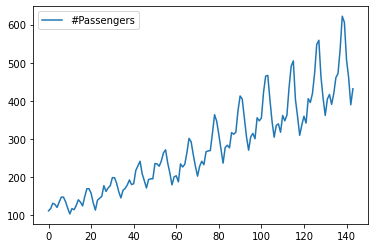

In [299]:
df.plot()

In [300]:
df.head(1)

,Month,#Passengers
0,1949-01,112


In [301]:
df.tail(1)

,Month,#Passengers
143,1960-12,432


In [302]:
432-112

320

In [303]:
#Rate of change
print('ROC =',(432-112)/(144-1))


ROC = 2.237762237762238


In [304]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [305]:
#changing type of column
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [306]:
df.index = df['Month']
del df['Month']

In [307]:
df.rename(columns={"#Passengers": "Passengers"}, inplace=True)

In [308]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [309]:
#Universal ROC formula
slp = (df.iloc[-1,0] - df.iloc[0,0])/(len(df)-1)
slp

2.237762237762238

In [310]:
np.linspace(112, 432, len(df))

array([112.        , 114.23776224, 116.47552448, 118.71328671,
       120.95104895, 123.18881119, 125.42657343, 127.66433566,
       129.9020979 , 132.13986014, 134.37762238, 136.61538462,
       138.85314685, 141.09090909, 143.32867133, 145.56643357,
       147.8041958 , 150.04195804, 152.27972028, 154.51748252,
       156.75524476, 158.99300699, 161.23076923, 163.46853147,
       165.70629371, 167.94405594, 170.18181818, 172.41958042,
       174.65734266, 176.8951049 , 179.13286713, 181.37062937,
       183.60839161, 185.84615385, 188.08391608, 190.32167832,
       192.55944056, 194.7972028 , 197.03496503, 199.27272727,
       201.51048951, 203.74825175, 205.98601399, 208.22377622,
       210.46153846, 212.6993007 , 214.93706294, 217.17482517,
       219.41258741, 221.65034965, 223.88811189, 226.12587413,
       228.36363636, 230.6013986 , 232.83916084, 235.07692308,
       237.31468531, 239.55244755, 241.79020979, 244.02797203,
       246.26573427, 248.5034965 , 250.74125874, 252.97

In [311]:
df['Trend'] = range(1, len(df)+1)

In [312]:
df['Simple_slope'] = np.linspace(112, 432, len(df))

In [313]:
df.head()

,Passengers,Trend,Simple_slope
Month,,,
1949-01-01,112,1,112.000000
1949-02-01,118,2,114.237762
1949-03-01,132,3,116.475524
1949-04-01,129,4,118.713287
1949-05-01,121,5,120.951049


<AxesSubplot:xlabel='Month'>

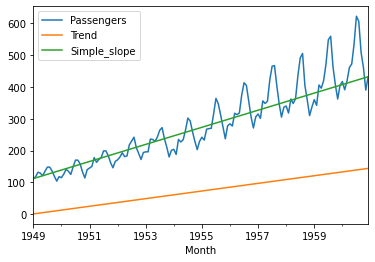

In [314]:
df.plot()

<AxesSubplot:xlabel='Month'>

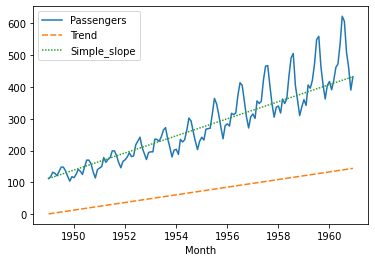

In [315]:
sns.lineplot(data=df)

In [316]:
model = sm.ols(formula="Passengers ~ Trend", data=df)
results = model.fit()

In [317]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     828.2
Date:                Thu, 19 May 2022   Prob (F-statistic):           4.02e-61
Time:                        17:36:06   Log-Likelihood:                -754.82
No. Observations:                 144   AIC:                             1514.
Df Residuals:                     142   BIC:                             1520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     87.6528      7.716     11.359      0.000      72.399     102.907
Trend          2.6572      0.092     28.778      0.000       2.475       2.840
==============================================================================
Omnibus:                       24.637   Durbin-Watson:                   0.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.905
Skew:                           0.940   Prob(JB):                     4.34e-08
Kurtosis:                       4.454   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [318]:
del df['Trend']

In [319]:
ic = results.params[0]
tc = results.params[1]

In [320]:
df['OLS'] = np.arange(ic, ic+len(df)*tc, tc)
df

,Passengers,Simple_slope,OLS
Month,,,
1949-01-01,112,112.000000,87.652778
1949-02-01,118,114.237762,90.309962
1949-03-01,132,116.475524,92.967146
1949-04-01,129,118.713287,95.624330
1949-05-01,121,120.951049,98.281513
...,...,...,...
1960-08-01,606,423.048951,457.001341
1960-09-01,508,425.286713,459.658525
1960-10-01,461,427.524476,462.315709


<AxesSubplot:xlabel='Month'>

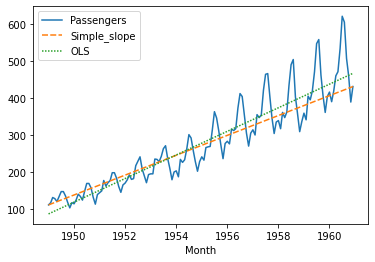

In [321]:
sns.lineplot(data=df)

In [322]:
#log change - whole
lgch = np.log(df.iloc[-1,0]) - np.log(df.iloc[0,0])
lgch

1.3499267169490166

In [323]:
#monthly log change 
df['Monthly_logPassangers'] = np.log(df.Passengers / df.Passengers.shift())

In [365]:
df['logSlope']=np.geomspace(112, 432, len(df))

In [366]:
df.head()

,Passengers,Simple_slope,OLS,Monthly_logPassangers,month,medPassengers,medMonthly_logPassangers,meanPassengers,meanMonthly_logPassangers,cumulatedseason,reg&season,logSlope
Month,,,,,,,,,,,,
1949-01-01,112,112.000000,87.652778,NaN,1,223.0,0.028988,241.750000,0.025154,0.028988,112.028988,112.000000
1949-02-01,118,114.237762,90.309962,0.052186,2,214.5,-0.031428,235.000000,-0.011986,-0.002440,117.997560,113.062291
1949-03-01,132,116.475524,92.967146,0.112117,3,251.5,0.135547,270.166667,0.140296,0.133107,132.133107,114.134658
1949-04-01,129,118.713287,95.624330,-0.022990,4,252.0,-0.023964,267.083333,-0.021200,0.109143,129.109143,115.217196
1949-05-01,121,120.951049,98.281513,-0.064022,5,252.0,0.017882,271.833333,0.007696,0.127024,121.127024,116.310002


<AxesSubplot:xlabel='Month'>

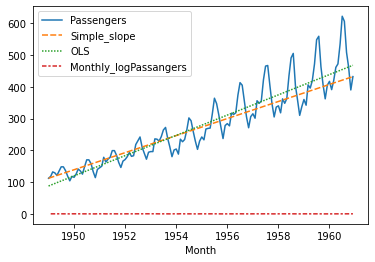

In [325]:
sns.lineplot(data=df)

In [326]:
df['month'] = df.index.month

In [327]:
df.head()

,Passengers,Simple_slope,OLS,Monthly_logPassangers,month
Month,,,,,
1949-01-01,112,112.000000,87.652778,NaN,1
1949-02-01,118,114.237762,90.309962,0.052186,2
1949-03-01,132,116.475524,92.967146,0.112117,3
1949-04-01,129,118.713287,95.624330,-0.022990,4
1949-05-01,121,120.951049,98.281513,-0.064022,5


<AxesSubplot:xlabel='month', ylabel='Monthly_logPassangers'>

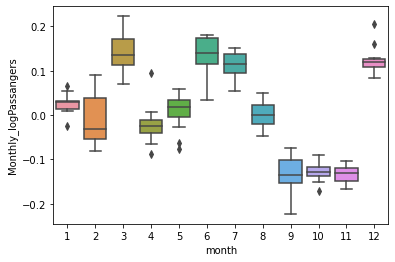

In [328]:
sns.boxplot(x="month", y="Monthly_logPassangers", data=df)

In [329]:
df.groupby(df['month']).head()

,Passengers,Simple_slope,OLS,Monthly_logPassangers,month
Month,,,,,
1949-01-01,112,112.000000,87.652778,NaN,1
1949-02-01,118,114.237762,90.309962,0.052186,2
1949-03-01,132,116.475524,92.967146,0.112117,3
1949-04-01,129,118.713287,95.624330,-0.022990,4
1949-05-01,121,120.951049,98.281513,-0.064022,5
1949-06-01,135,123.188811,100.938697,0.109484,6
1949-07-01,148,125.426573,103.595881,0.091937,7
1949-08-01,148,127.664336,106.253065,0.000000,8
1949-09-01,136,129.902098,108.910249,-0.084557,9


In [330]:
medians = df.filter(['month', 'Passengers', 'Monthly_logPassangers']).groupby('month').median()
medians.rename(columns={'Passengers':'medPassengers', 'Monthly_logPassangers': 'medMonthly_logPassangers'}, inplace=True)
medians

,medPassengers,medMonthly_logPassangers
month,,
1,223.0,0.028988
2,214.5,-0.031428
3,251.5,0.135547
4,252.0,-0.023964
5,252.0,0.017882
6,289.5,0.139719
7,333.0,0.116310
8,320.0,0.000000
9,285.5,-0.134756


In [331]:
df = df.join(medians, how='left', on='month')
df.head()

,Passengers,Simple_slope,OLS,Monthly_logPassangers,month,medPassengers,medMonthly_logPassangers
Month,,,,,,,
1949-01-01,112,112.000000,87.652778,NaN,1,223.0,0.028988
1949-02-01,118,114.237762,90.309962,0.052186,2,214.5,-0.031428
1949-03-01,132,116.475524,92.967146,0.112117,3,251.5,0.135547
1949-04-01,129,118.713287,95.624330,-0.022990,4,252.0,-0.023964
1949-05-01,121,120.951049,98.281513,-0.064022,5,252.0,0.017882


In [332]:
means = df.filter(['month', 'Passengers', 'Monthly_logPassangers']).groupby('month').mean()
means.rename(columns={'Passengers':'meanPassengers', 'Monthly_logPassangers': 'meanMonthly_logPassangers'}, inplace=True)
means

,meanPassengers,meanMonthly_logPassangers
month,,
1,241.750000,0.025154
2,235.000000,-0.011986
3,270.166667,0.140296
4,267.083333,-0.021200
5,271.833333,0.007696
6,311.666667,0.132215
7,351.333333,0.114011
8,351.083333,0.000774
9,302.416667,-0.134566


In [333]:
df = df.join(means, how='left', on='month')
df.head()

,Passengers,Simple_slope,OLS,Monthly_logPassangers,month,medPassengers,medMonthly_logPassangers,meanPassengers,meanMonthly_logPassangers
Month,,,,,,,,,
1949-01-01,112,112.000000,87.652778,NaN,1,223.0,0.028988,241.750000,0.025154
1949-02-01,118,114.237762,90.309962,0.052186,2,214.5,-0.031428,235.000000,-0.011986
1949-03-01,132,116.475524,92.967146,0.112117,3,251.5,0.135547,270.166667,0.140296
1949-04-01,129,118.713287,95.624330,-0.022990,4,252.0,-0.023964,267.083333,-0.021200
1949-05-01,121,120.951049,98.281513,-0.064022,5,252.0,0.017882,271.833333,0.007696


In [367]:
df['cumulatedseason'] = df['medMonthly_logPassangers'].cumsum(axis = 0)
df.head()

,Passengers,Simple_slope,OLS,Monthly_logPassangers,month,medPassengers,medMonthly_logPassangers,meanPassengers,meanMonthly_logPassangers,cumulatedseason,reg&season,logSlope
Month,,,,,,,,,,,,
1949-01-01,112,112.000000,87.652778,NaN,1,223.0,0.028988,241.750000,0.025154,0.028988,112.028988,112.000000
1949-02-01,118,114.237762,90.309962,0.052186,2,214.5,-0.031428,235.000000,-0.011986,-0.002440,117.997560,113.062291
1949-03-01,132,116.475524,92.967146,0.112117,3,251.5,0.135547,270.166667,0.140296,0.133107,132.133107,114.134658
1949-04-01,129,118.713287,95.624330,-0.022990,4,252.0,-0.023964,267.083333,-0.021200,0.109143,129.109143,115.217196
1949-05-01,121,120.951049,98.281513,-0.064022,5,252.0,0.017882,271.833333,0.007696,0.127024,121.127024,116.310002


In [368]:
df['reg&season'] = df['logSlope'] + df['cumulatedseason']
df.head()

,Passengers,Simple_slope,OLS,Monthly_logPassangers,month,medPassengers,medMonthly_logPassangers,meanPassengers,meanMonthly_logPassangers,cumulatedseason,reg&season,logSlope
Month,,,,,,,,,,,,
1949-01-01,112,112.000000,87.652778,NaN,1,223.0,0.028988,241.750000,0.025154,0.028988,112.028988,112.000000
1949-02-01,118,114.237762,90.309962,0.052186,2,214.5,-0.031428,235.000000,-0.011986,-0.002440,113.059851,113.062291
1949-03-01,132,116.475524,92.967146,0.112117,3,251.5,0.135547,270.166667,0.140296,0.133107,114.267765,114.134658
1949-04-01,129,118.713287,95.624330,-0.022990,4,252.0,-0.023964,267.083333,-0.021200,0.109143,115.326339,115.217196
1949-05-01,121,120.951049,98.281513,-0.064022,5,252.0,0.017882,271.833333,0.007696,0.127024,116.437026,116.310002


<AxesSubplot:xlabel='Month'>

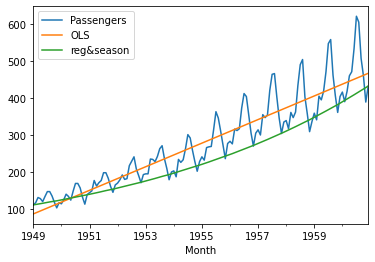

In [369]:
df.filter(['Passengers','OLS','reg&season']).plot()